In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from shapely.geometry import Point, LineString, Polygon
from datetime import timedelta

**Reading files**

Read two csv files - summer and winter, and check the info of the datasets.

In [ ]:
summer = pd.read_csv("summer_2021.csv")

FileNotFoundError: ignored

In [ ]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136283 entries, 0 to 1136282
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Trip ID                     1136283 non-null  object 
 1   Taxi ID                     1136278 non-null  object 
 2   Trip Start Timestamp        1136283 non-null  object 
 3   Trip End Timestamp          1136283 non-null  object 
 4   Trip Seconds                1136058 non-null  float64
 5   Trip Miles                  1136016 non-null  float64
 6   Pickup Census Tract         345232 non-null   float64
 7   Dropoff Census Tract        339452 non-null   float64
 8   Pickup Community Area       1037654 non-null  float64
 9   Dropoff Community Area      985227 non-null   float64
 10  Fare                        1136155 non-null  float64
 11  Tips                        1136155 non-null  float64
 12  Tolls                       1136155 non-null  float64
 1

In [ ]:
winter = pd.read_csv("winter_2021.csv")

In [ ]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370851 entries, 0 to 1370850
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Trip ID                     1370851 non-null  object 
 1   Taxi ID                     1370649 non-null  object 
 2   Trip Start Timestamp        1370851 non-null  object 
 3   Trip End Timestamp          1370851 non-null  object 
 4   Trip Seconds                1370541 non-null  float64
 5   Trip Miles                  1370700 non-null  float64
 6   Pickup Census Tract         512578 non-null   float64
 7   Dropoff Census Tract        513435 non-null   float64
 8   Pickup Community Area       1266782 non-null  float64
 9   Dropoff Community Area      1227909 non-null  float64
 10  Fare                        1370562 non-null  float64
 11  Tips                        1370562 non-null  float64
 12  Tolls                       1370562 non-null  float64
 1

In [ ]:
winter.tail(20)

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
1370850,18c63ea0856a928490f91acfc35043ca3dca1fcc,55e53aceec1519445bae3e8414b4cbf11e59e50800f714...,03/23/2022 10:30:00 PM,09/22/2014 02:00:00 PM,NaN,1.0,NaN,NaN,NaN,8.0,...,2.0,38.05,Cash,Blue Ribbon Taxi Association Inc.,NaN,NaN,NaN,41.899602,-87.633308,POINT (-87.6333080367 41.899602111)


**Data cleaning**

1. We don't want the data has zero trip miles.
2. By checking the dataset, we find there are some data's starting time is after the ending time. We need to drop these data as well.
3. Also, we need to drop the NaN in the columns of Trip Secondsd and Trip Miles.

In [ ]:
summer = summer[summer['Trip Miles']>0]
winter = winter[winter['Trip Miles']>0]

In [ ]:
summer['Trip Start Timestamp'] = pd.to_datetime(summer['Trip Start Timestamp'])
summer['Trip End Timestamp'] = pd.to_datetime(summer['Trip End Timestamp'])
winter['Trip Start Timestamp'] = pd.to_datetime(winter['Trip Start Timestamp'])
winter['Trip End Timestamp'] = pd.to_datetime(winter['Trip End Timestamp'])

In [ ]:
summer = summer[summer['Trip Miles'] != 0]
summer = summer.drop(summer[(summer['Trip Start Timestamp'] > summer['Trip End Timestamp'])].index)
winter = winter[winter['Trip Miles'] != 0]
winter = winter.drop(winter[(winter['Trip Start Timestamp'] > winter['Trip End Timestamp'])].index)

In [ ]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949557 entries, 0 to 1136278
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Trip ID                     949557 non-null  object        
 1   Taxi ID                     949554 non-null  object        
 2   Trip Start Timestamp        949557 non-null  datetime64[ns]
 3   Trip End Timestamp          949557 non-null  datetime64[ns]
 4   Trip Seconds                949375 non-null  float64       
 5   Trip Miles                  949557 non-null  float64       
 6   Pickup Census Tract         280592 non-null  float64       
 7   Dropoff Census Tract        278072 non-null  float64       
 8   Pickup Community Area       865875 non-null  float64       
 9   Dropoff Community Area      821835 non-null  float64       
 10  Fare                        949461 non-null  float64       
 11  Tips                        949461 non

In [ ]:
winter.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,dba133677195863cad188211430dc96b397ed9d2,89c8884dd87ee559429e92b9546ba19eb18736a172aef7...,2021-10-01 00:15:00,2021-10-01 00:45:00,1654.0,14.34,NaN,NaN,NaN,NaN,...,4.0,51.56,Credit Card,Flash Cab,NaN,NaN,NaN,NaN,NaN,NaN
1,07ee3a858ce0bb2b4a323e151f1f18636845c707,f71223a469d78a2f65a090adc9d4fb5ae08dfc6694c650...,2021-10-01 00:15:00,2021-10-01 00:15:00,410.0,1.84,NaN,NaN,8.0,7.0,...,0.0,8.00,Cash,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,1c7d27ddd6b225031154e84bccc773b793d9d165,16c9cec3bf7e9c7a75a8c64e649e390af508e6e9694b80...,2021-10-01 00:15:00,2021-10-01 00:30:00,1500.0,1.10,1.703198e+10,1.703184e+10,76.0,32.0,...,4.0,58.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
6,2bbd826fe9a43cc3fa29a324d7cc1c884400320e,a6339ac0faf854f037370b311945d5e1e67b8fd7ff537d...,2021-10-01 00:15:00,2021-10-01 00:45:00,1892.0,22.71,1.703198e+10,NaN,76.0,NaN,...,35.5,109.50,Credit Card,City Service,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
7,2abfc1004e7c7d211d01afea4342c7f359c7a429,8b1a88e5a09cfd55ca72d267f00f56fa50a42aa322bdfe...,2021-10-01 00:15:00,2021-10-01 00:30:00,1143.0,12.35,NaN,NaN,NaN,22.0,...,4.0,43.50,Credit Card,Flash Cab,NaN,NaN,NaN,41.922761,-87.699155,POINT (-87.6991553432 41.9227606205)


**Make graph based on different conditions**

For these graphs below, we only use the dataset that we read already.

In [ ]:
summer_hr = summer.groupby(summer['Trip Start Timestamp'].dt.hour).count()
summer_hr = pd.DataFrame(summer_hr,columns=['Trip ID'])
summer_hr.columns = ['num of rides']
summer_hr['hour'] = list(range(0,24))

winter_hr = winter.groupby(winter['Trip Start Timestamp'].dt.hour).count()
winter_hr = pd.DataFrame(winter_hr,columns=['Trip ID'])
winter_hr.columns = ['num of rides']
winter_hr['hour'] = list(range(0,24))

In [ ]:
summer_hr.head()

,num of rides,hour
Trip Start Timestamp,,
0,22685,0
1,16672,1
2,11297,2
3,7281,3
4,6195,4


Text(0.5, 1.0, 'The total number of rides in summer based on each hour')

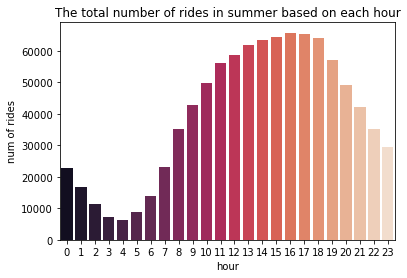

In [ ]:
sns.color_palette("rocket", as_cmap=True)
ax = sns.barplot(x='hour',y='num of rides',palette = "rocket", data=summer_hr)
plt.title('The total number of rides in summer based on each hour')

Text(0.5, 1.0, 'The total number of rides in winter based on each hour')

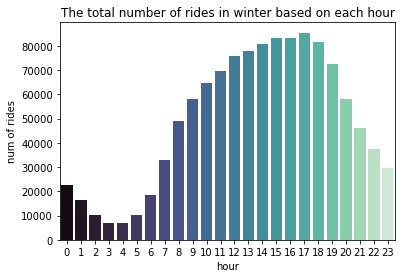

In [ ]:
sns.color_palette("mako", as_cmap=True)
ax = sns.barplot(x='hour',y='num of rides',palette = "mako", data=winter_hr)
plt.title('The total number of rides in winter based on each hour')

In [ ]:
summer_pr = summer.groupby(summer['Trip Start Timestamp'].dt.hour).mean()
summer_pr = pd.DataFrame(summer_pr,columns=['Trip Total'])
summer_pr.columns = ['ave spending']
summer_pr['hour'] = list(range(0,24))

winter_pr = winter.groupby(winter['Trip Start Timestamp'].dt.hour).mean()
winter_pr = pd.DataFrame(winter_pr,columns=['Trip Total'])
winter_pr.columns = ['ave spending']
winter_pr['hour'] = list(range(0,24))

Text(0.5, 1.0, 'The average spending of one ride in summer based on each hour')

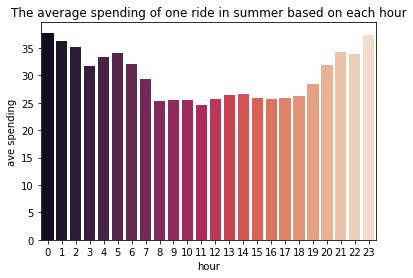

In [ ]:
sns.color_palette("rocket", as_cmap=True)
ax = sns.barplot(x='hour',y='ave spending',palette = "rocket", data=summer_pr)
plt.title('The average spending of one ride in summer based on each hour')

Text(0.5, 1.0, 'The average spending of one ride in winter based on each hour')

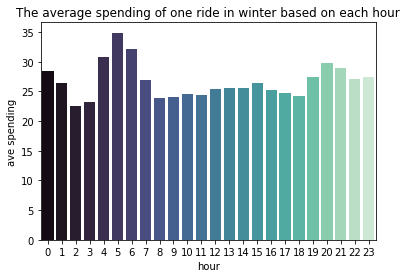

In [ ]:
sns.color_palette("mako", as_cmap=True)
ax = sns.barplot(x='hour',y='ave spending',palette = "mako", data=winter_pr)
plt.title('The average spending of one ride in winter based on each hour')

In [ ]:
geometry_summer = [Point(xy) for xy in zip(summer['Pickup Centroid Longitude'], summer['Pickup Centroid Latitude'])]
gdf_summer = gpd.GeoDataFrame(summer, geometry=geometry_summer, crs=4326) 
geometry_winter = [Point(xy) for xy in zip(winter['Pickup Centroid Longitude'], winter['Pickup Centroid Latitude'])]
gdf_winter = gpd.GeoDataFrame(winter, geometry=geometry_winter, crs=4326) 

**Read the geojson file**

Read the chicago.geojson file, and we will do some tasks.

In [ ]:
chicago = gpd.read_file('chicago.geojson')

<AxesSubplot:>

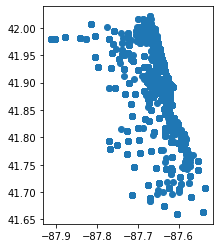

In [ ]:
gdf_summer.plot()

<AxesSubplot:ylabel='Frequency'>

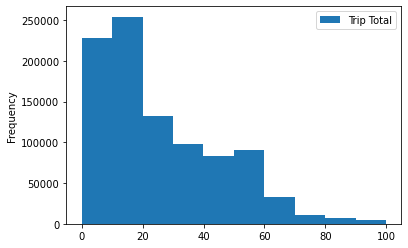

In [ ]:
gdf_summer[gdf_summer['Trip Total']<100]['Trip Total'].plot(kind='hist',legend=True)
#gdf_winter['area'] = gdf_winter.area
#gdf_summer.plot("area", legend=True)

<AxesSubplot:ylabel='Frequency'>

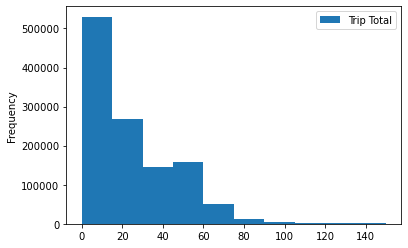

In [ ]:
gdf_winter[gdf_winter['Trip Total']<150]['Trip Total'].plot(kind='hist', legend=True)

In [ ]:
gdf_summer.dtypes

Trip ID                               object
Taxi ID                               object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tips                                 float64
Tolls                                float64
Extras                               float64
Trip Total                           float64
Payment Type                          object
Company                               object
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Ce

**Join the datasets**

We will join the dataset summer and winter with Chicago separately, and we will use the new dataset to make graph and maps based on the zip code of each area.

In [ ]:
joined_summer = gpd.sjoin(gdf_summer, chicago, predicate='within')
joined_winter = gpd.sjoin(gdf_winter, chicago, predicate='within')

In [ ]:
loop_summer=joined_summer.loc[joined_summer['zip'].isin(['60601','60602','60603','60604','60605','60606','60607','60616'])]
loop_summer=loop_summer.groupby(loop_summer['Trip Start Timestamp'].dt.hour).mean()
loop_summer=pd.DataFrame(loop_summer,columns=['Trip Total'])
loop_summer['Area']='loop'
loop_summer = loop_summer.iloc[[19,20,21,22,23]]
loop_summer['hour']=list(range(19,24))

loop_winter=joined_winter.loc[joined_winter['zip'].isin(['60601','60602','60603','60604','60605','60606','60607','60616'])]
loop_winter=loop_winter.groupby(loop_winter['Trip Start Timestamp'].dt.hour).mean()
loop_winter=pd.DataFrame(loop_winter,columns=['Trip Total'])
loop_winter['Area']='loop'
loop_winter = loop_winter.iloc[[0,1,2,3,4,5,6,7]]
loop_winter['hour']=list(range(0,8))



airport_summer=joined_summer.loc[joined_summer['zip'].isin(['60656','60666'])]
airport_summer=airport_summer.groupby(airport_summer['Trip Start Timestamp'].dt.hour).mean()
airport_summer=pd.DataFrame(airport_summer,columns=['Trip Total'])
airport_summer['Area']='airport'
airport_summer = airport_summer.iloc[[19,20,21,22,23]]
airport_summer['hour']=list(range(19,24))

airport_winter=joined_winter.loc[joined_winter['zip'].isin(['60656','60666'])]
airport_winter=airport_winter.groupby(airport_winter['Trip Start Timestamp'].dt.hour).mean()
airport_winter=pd.DataFrame(airport_winter,columns=['Trip Total'])
airport_winter['Area']='airport'
airport_winter = airport_winter.iloc[[0,1,2,3,4,5,6,7]]
airport_winter['hour']=list(range(0,8))

In [ ]:
airport_winter.head(24)

,Trip Total,Area,hour
Trip Start Timestamp,,,
0,19.751152,airport,0
1,18.817050,airport,1
2,19.065484,airport,2
3,21.903371,airport,3
4,27.947836,airport,4
5,25.714145,airport,5
6,27.187080,airport,6
7,26.035906,airport,7


In [ ]:
winter=pd.concat([loop_winter,airport_winter])
winter.columns=['Ave price', 'Area', 'hour']
summer=pd.concat([loop_summer,airport_summer])
summer.columns=['Ave price', 'Area', 'hour']

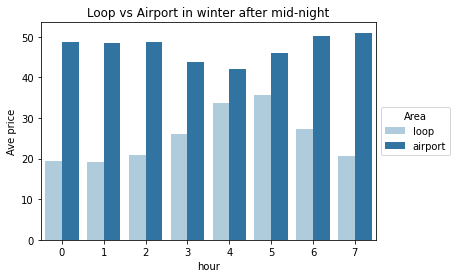

In [ ]:
sns.color_palette('viridis', as_cmap=True)
ax1 = sns.barplot(x='hour', y='Ave price', palette = 'Paired', hue='Area', data=winter)
plt.title("Loop vs Airport in winter after mid-night")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Area')

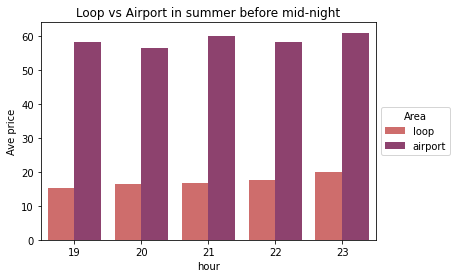

In [ ]:
sns.color_palette('viridis', as_cmap=True)
ax1 = sns.barplot(x='hour', y='Ave price', palette = 'flare', hue='Area', data=summer)
plt.title("Loop vs Airport in summer before mid-night")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Area')

In [ ]:
joined_summer.dtypes

Trip ID                               object
Taxi ID                               object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tips                                 float64
Tolls                                float64
Extras                               float64
Trip Total                           float64
Payment Type                          object
Company                               object
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Ce

In [ ]:
js = joined_summer.groupby("zip").mean()
js = js.filter(['Trip Total'])
js = js.rename(columns={'geometry': 'Trip Total'})

In [ ]:
jw = joined_winter.groupby("zip").mean()
jw = jw.filter(['Trip Total'])
jw = jw.rename(columns={'geometry': 'Trip Total'})

In [ ]:
jw.head()

,Trip Total
zip,
60601,14.995724
60603,12.361616
60604,19.095408
60605,17.448386
60607,19.990412


In [ ]:
merged_s = pd.merge(js, chicago, right_on='zip', left_index=True)

In [ ]:
merged_s.dtypes

Trip Total     float64
objectid        object
shape_area      object
shape_len       object
zip             object
geometry      geometry
dtype: object

In [ ]:
merged_s['objectid'] = merged_s['objectid'].astype(int)
merged_s['shape_len'] = merged_s['shape_len'].astype(float)
merged_s['shape_area'] = merged_s['shape_area'].astype(float)
merged_s['zip'] = merged_s['zip'].astype(int)

In [ ]:
merged_s.head(150)

,Trip Total,objectid,shape_area,shape_len,zip,geometry
41,14.570099,27,9.166246e+06,19804.582109,60601,"MULTIPOLYGON (((-87.62271 41.88884, -87.62232 ..."
33,12.482988,19,4.560229e+06,13672.682289,60603,"MULTIPOLYGON (((-87.61633 41.88211, -87.61635 ..."
28,18.493453,48,4.294902e+06,12245.808402,60604,"MULTIPOLYGON (((-87.63376 41.87924, -87.63375 ..."
34,18.621620,20,3.630128e+07,37973.346105,60605,"MULTIPOLYGON (((-87.62064 41.87705, -87.61740 ..."
43,19.503295,29,6.466429e+07,39143.639517,60607,"MULTIPOLYGON (((-87.63962 41.87677, -87.63928 ..."
42,22.237512,28,1.765055e+08,53169.217720,60608,"MULTIPOLYGON (((-87.64671 41.85991, -87.64670 ..."
36,24.130779,22,2.134903e+08,58540.920413,60609,"MULTIPOLYGON (((-87.62665 41.83091, -87.62664 ..."
53,17.274088,54,3.159816e+07,24208.698879,60610,"MULTIPOLYGON (((-87.62820 41.89668, -87.62820 ..."
5,14.833240,38,2.350606e+07,34689.350631,60611,"MULTIPOLYGON (((-87.61401 41.89354, -87.61369 ..."
27,20.488403,16,1.067189e+08,42663.196676,60612,"MULTIPOLYGON (((-87.67704 41.89564, -87.67704 ..."


<AxesSubplot:>

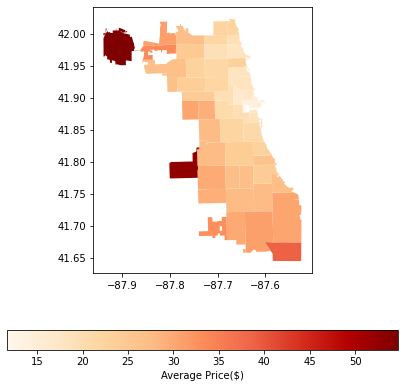

In [ ]:
merged_s = merged_s.set_geometry('geometry')
#merged_s = merged_s[merged_s['zip']==60607]
merged_s.plot('Trip Total',figsize=(7,7),legend=True,cmap='OrRd',legend_kwds={'label':'Average Price($)','orientation':'horizontal'})

In [ ]:
merged_w = pd.merge(jw, chicago, right_on='zip', left_index=True)

In [ ]:
merged_w.dtypes

Trip Total     float64
objectid        object
shape_area      object
shape_len       object
zip             object
geometry      geometry
dtype: object

<AxesSubplot:>

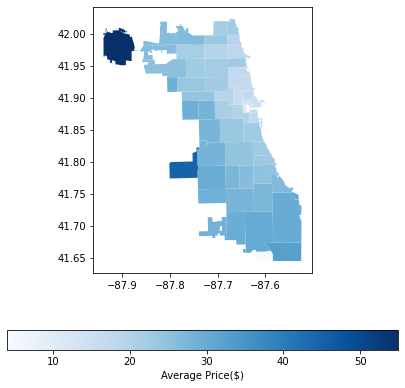

In [ ]:
merged_w = merged_w.set_geometry('geometry')
merged_w.plot('Trip Total',figsize=(7,7),legend=True,cmap='Blues',legend_kwds={'label':'Average Price($)','orientation':'horizontal'})


In [ ]:
jcs = joined_summer.groupby("zip").count()
jcs = jcs.filter(['geometry'])
jcs = jcs.rename(columns={'geometry': 'count'})

In [ ]:
merged_cs = pd.merge(jcs, chicago, right_on='zip', left_index=True)

In [ ]:
merged_cs['objectid'] = merged_cs['objectid'].astype(int)
merged_cs['shape_len'] = merged_cs['shape_len'].astype(float)
merged_cs['shape_area'] = merged_cs['shape_area'].astype(float)
merged_cs['zip'] = merged_cs['zip'].astype(int)

<AxesSubplot:>

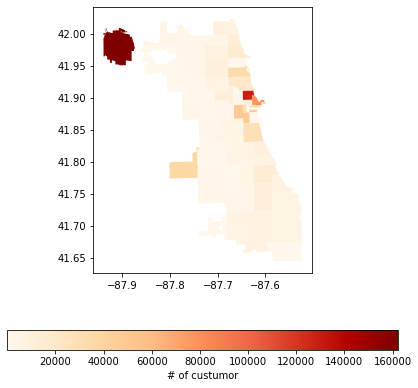

In [ ]:
merged_cs = merged_cs.set_geometry('geometry')
merged_cs.plot('count',figsize=(7,7),legend=True,cmap='OrRd',legend_kwds={'label':'number of rides','orientation':'horizontal'})

In [ ]:
jcw = joined_winter.groupby("zip").count()
jcw = jcw.filter(['geometry'])
jcw = jcw.rename(columns={'geometry': 'count'})

In [ ]:
merged_cw = pd.merge(jcw, chicago, right_on='zip', left_index=True)

In [ ]:
merged_cw['objectid'] = merged_cw['objectid'].astype(int)
merged_cw['shape_len'] = merged_cw['shape_len'].astype(float)
merged_cw['shape_area'] = merged_cw['shape_area'].astype(float)
merged_cw['zip'] = merged_cw['zip'].astype(int)

<AxesSubplot:>

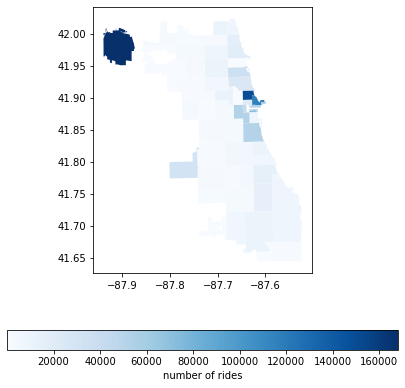

In [ ]:
merged_cw = merged_cw.set_geometry('geometry')
merged_cw.plot('count',figsize=(7,7),legend=True,cmap='Blues',legend_kwds={'label':'number of rides','orientation':'horizontal'})
